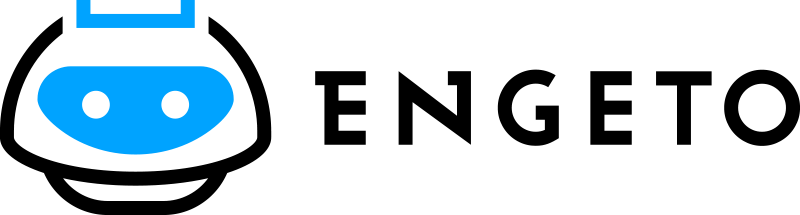

## Kde najdete materiály?

Na portalu engeta - https://learn.engeto.com/

#Úvod

Dozvíme se o existenci window functions a možnostech využívání dalších (aritmetických, řetězcových) operací v `SELECT` a `WHERE` klauzulích. 

Představíme klauzuli `HAVING` a použití společně s agregačními funkcemi. 

Na závěr přejdeme ke Common Table Expressions.


#dbdiagram.io

Homepage - https://dbdiagram.io/home

Dokumentace - https://dbdiagram.io/docs/




Umožňuje uživatelům snadno a rychle navrhovat relační databáze pomocí intuitivního uživatelského rozhraní a vizuálního editoru. 

Uživatelé mohou přidávat tabulky, sloupce, vztahy a další prvky, a aplikace automaticky generuje kód SQL pro vytvoření databáze.

Jednou z výhod dbdiagram.io je jeho jednoduchost. 

Uživatelé nemusí mít předchozí zkušenosti s návrhem databází nebo znalosti SQL syntaxe, aby mohli začít používat aplikaci. 

Navíc aplikace poskytuje řadu užitečných funkcí, jako je například možnost importovat stávající schémata databáze nebo exportovat diagramy do různých formátů.



### Jazyk DBML 

https://www.dbml.org/docs/#project-definition



DBML (Database Markup Language) je jazyk pro popis relačních databází, který umožňuje vytvářet a spravovat schémata databází pomocí textového souboru. 

DBML byl vytvořen pro použití s nástrojem dbdiagram.io, ale může být použit i s jinými nástroji pro návrh databází.

S DBML lze definovat tabulky, sloupce, primární a cizí klíče, indexy a další prvky databáze pomocí jednoduché syntaxe. 

DBML také umožňuje definovat vztahy mezi tabulkami.

##Materiály do cvičení

[dbdiabram.io vstup](https://github.com/KammermayerJ/csob_data_academy_2023/blob/main/lesson_05/lesson_05_dbdiagram_io.txt)


[SQL script pro Dbeaver](https://github.com/KammermayerJ/csob_data_academy_2023/blob/main/lesson_05/lesson_05_dbdiagram_io_dbeaver.sql)







##Úkoly
Vyberte z tabulky `doctor` sloupce id, jméno a příjmení. Připojte tabulku `address` a vypište název ulice a číslo ulice.

In [ ]:

SELECT
    d.id, 
    d.name, 
    d.surname,
    a.street, 
    a.street_number
FROM doctor d 
LEFT JOIN address a 
	  ON d.address_id = a.id;


Podívejte se jaké položky máme v tabulce `medicament`.

In [ ]:

SELECT * FROM medicament;


Vypište jméno a příjmení pacienta a k němu dodatečné informace o tom jaké léky bere a jejich množství s jednotkami. Data agregujte.

In [ ]:

SELECT
    p.name, 
    p.surname,
    m.name AS medicament_name,
    SUM(lom.amount) AS amount, 
    m.unit 
FROM patient p
JOIN prescription pr
	  ON p.id = pr.patient_id
JOIN list_of_medicaments lom
	  ON pr.id = lom.prescription_id
JOIN medicament m
	  ON lom.medicament_id = m.id
GROUP BY p.name, p.surname, m.name, m.unit
ORDER BY p.surname, p.name;


In [ ]:

SELECT * FROM patient;


Vložte do tabulky `patient` nový záznam.

In [ ]:

INSERT INTO patient(name, surname, address_id, insurance_company)
	VALUES ('Jan', 'Nedohledatelné', NULL, 'State insurance');
  

Vypište seznam pacientů s jejich adresami. 

In [ ]:

SELECT
	*
FROM patient p 
JOIN address a 
	  ON p.address_id = a.id;


In [ ]:

SELECT
	*
FROM patient p 
LEFT JOIN address a 
	ON p.address_id = a.id;


Vypište seznam doktorů a pacientů, stačí jejich jméno a příjmení.

In [ ]:

SELECT name, surname, 'doktor' AS person_position
FROM doctor
UNION
SELECT name, surname, 'pacient' AS person_position
FROM patient;


In [ ]:

SELECT name, surname
FROM doctor
UNION ALL
SELECT name, surname
FROM patient;


#Modulo

Operátor modulo (značený %) slouží k výpočtu zbytku po celočíselném dělení. 


##Úkol 1
Vyzkoušejte si operátor modulo (zbytek po celočíselném dělení).



In [ ]:

SELECT 5 % 2;
SELECT 14 % 5;
SELECT 15 % 5;


Na co se používá dělitelnost jedenácti?



In [ ]:
SELECT 123456789874 % 11;

##Úkol 2

Využijte operátor modulo na zjištění sudosti populace v tabulce `economies`.

Populace - zbytek po dělení dvěma:







In [ ]:
SELECT
    country, 
    year, 
    population, 
    CAST(population AS INT) % 2 AS division_rest
FROM economies e
WHERE population IS NOT NULL;


Populace - flag zda je lichá:



In [ ]:

SELECT
    country, 
    year, 
    population, 
    CAST(population AS INT) % 2 AS is_odd
FROM economies e
WHERE population IS NOT NULL;


Populace - flag zda je lichá se selekcí:



In [ ]:

SELECT
    country, 
    year, 
    population, 
    CAST(population AS INT) % 2 AS is_odd
FROM economies e
WHERE population IS NOT NULL
    AND CAST(population AS INT) % 2 = 1;
    

#DISTINCT

V jazyce SQL klíčové slovo `DISTINCT` slouží k odstranění duplicitních řádků z výsledku dotazu. 

V `SELECT` klauzuli, zobrazí se pouze unikátní hodnoty ze sloupců, které jsou uvedeny v `SELECT` klauzuli. 

Pokud jsou v ní uvedeny více sloupců, bude dotaz odstraňovat řádky, které jsou duplicitní ve všech sloupcích, ne pouze v jednom sloupci.



##Úkol 1
Z tabulky `healthcare_provider` získejte pouze unikátní hodnoty ze sloupce `municipality`.

In [ ]:

SELECT 
	  municipality
FROM healthcare_provider hp 
GROUP BY municipality;


In [ ]:

SELECT 
	  DISTINCT municipality
FROM healthcare_provider hp;


In [ ]:

SELECT 
	  COUNT(DISTINCT municipality)
FROM healthcare_provider hp;


In [ ]:

SELECT 
	  municipality,
	  COUNT(1) AS counter
FROM healthcare_provider hp 
GROUP BY municipality
ORDER BY counter DESC;


##Úkol 2
K tabulce `healthcare_provider` připojte potřebné tabulky a získejte název okresu a kraje.

In [ ]:

SELECT 
    DISTINCT 
    cr.name AS region_name,
    cd.name AS district_name
FROM healthcare_provider hp 
LEFT JOIN czechia_region cr ON cr.code = hp.region_code 
LEFT JOIN czechia_district cd ON cd.code = hp.district_code;


#Common Table Expression - CTE

Common Table Expression (CTE) je funkce v jazyku SQL, která umožňuje vytvoření dočasné tabulky, která je přístupná v rámci jednoho `SELECT`, `INSERT`, `UPDATE` nebo `DELETE` příkazu. 

CTE je užitečná, když potřebujete provést složitý dotaz na databázi, který vyžaduje více kroků a manipulací s daty.

##Úkol 1
Pomocí operátoru `WITH` připravte tabulku s cenami nad 150 Kč. 

S její pomocí následně vypište jména takových kategorií potravin, které do této cenové hladiny spadají.



In [ ]:

WITH high_price AS (
    SELECT category_code AS code
    FROM czechia_price
    WHERE value > 150
)
SELECT DISTINCT cpc.name
FROM high_price hp
JOIN czechia_price_category cpc
    ON hp.code = cpc.code;


##Úkol 2
Zjistěte, ve kterých okresech mají všichni praktičtí lékaři vyplněný telefon, fax, nebo e-mail. 

Pro tyto účely si připravte dočasnou tabulku s výčtem okresů, ve kterých tato podmínka naopak splněna není, pod názvem `not_completed_provider_info_district`.

In [ ]:

WITH not_completed_provider_info_district AS (
    SELECT 
        DISTINCT district_code
    FROM healthcare_provider
    WHERE 
        phone IS NULL 
        AND email IS NULL 
        AND fax IS NULL 
        AND provider_type = 'Samost. ordinace všeob. prakt. lékaře'
)
SELECT *
FROM czechia_district
WHERE code NOT IN (
    SELECT *
    FROM not_completed_provider_info_district
);


##Úkol 3

Vypište z tabulky economies průměr světových daní, při HDP vyšším než 70 miliard.


In [ ]:

WITH large_gdp_area AS (
    SELECT *
    FROM economies
    WHERE GDP > 70 000 000 000
)
SELECT
    ROUND( AVG(taxes), 2) AS taxes_average
FROM large_gdp_area;



#Window functions

Window functions jsou speciální druh funkcí v jazyce SQL, které umožňují aplikovat výpočty na řady řádků v rámci okna (window) definovaného v rámci výsledků dotazu. 

Tato funkce umožňuje aplikovat výpočty, jako jsou sumy, průměry, ranky, percentily a další, na skupiny řádků bez nutnosti seskupovat data v dotazu. 

Window functions jsou velmi užitečné pro analýzu trendů a porovnávání dat v rámci skupin, a umožňují výsledky dotazu prezentovat v přehlednější a strukturovanější formě.

Window functions se definují pomocí klauzule OVER, která určuje okno, na kterém se má funkce aplikovat. 


https://learn.microsoft.com/en-us/sql/t-sql/queries/select-over-clause-transact-sql?view=sql-server-ver16

In [ ]:

WITH sales_data AS (
    SELECT '2023-03-01' AS date, 'product 1' AS product, 40 AS sales
    UNION ALL
    SELECT '2023-03-02' AS date, 'product 1' AS product, 66 AS sales
    UNION ALL
    SELECT '2023-03-03' AS date, 'product 1' AS product, 50 AS sales
    UNION ALL
    SELECT '2023-03-03' AS date, 'product 1' AS product, 50 AS sales
    UNION ALL
    SELECT '2023-03-05' AS date, 'product 1' AS product, 9 AS sales
    UNION ALL
    SELECT '2023-03-05' AS date, 'product 2' AS product, 15 AS sales
)
SELECT 
    *,  
    SUM(sales) OVER (PARTITION BY product ORDER BY date) AS value_cumulative_sum_default,  
    SUM(sales) OVER (PARTITION BY product ORDER BY date ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS value_cumulative_sum,  
    SUM(sales) OVER (PARTITION BY product ORDER BY date ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS value_cumulative_sum_last_2,  
    SUM(sales) OVER (PARTITION BY product ORDER BY date ROWS BETWEEN 1 PRECEDING AND 1 FOLLOWING) AS value_cumulative_sum_last_1_next_1
FROM sales_data


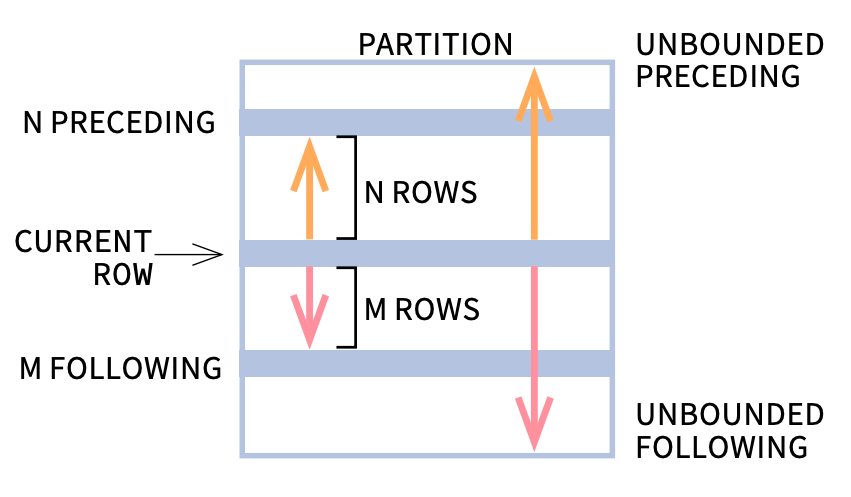

In [ ]:

WITH sales_data AS (
    SELECT '2023-03-01' AS date, 'product 1' AS product, 40 AS sales
    UNION ALL
    SELECT '2023-03-02' AS date, 'product 1' AS product, 66 AS sales
    UNION ALL
    SELECT '2023-03-03' AS date, 'product 1' AS product, 50 AS sales
    UNION ALL
    SELECT '2023-03-03' AS date, 'product 1' AS product, 50 AS sales
    UNION ALL
    SELECT '2023-03-05' AS date, 'product 1' AS product, 9 AS sales
    UNION ALL
    SELECT '2023-03-05' AS date, 'product 2' AS product, 15 AS sales
)
SELECT 
    *,
    RANK() OVER (PARTITION BY product ORDER BY date) AS value_rank,
    DENSE_RANK() OVER (PARTITION BY product ORDER BY date) AS value_dense_rank,
    ROW_NUMBER() OVER (PARTITION BY product ORDER BY date) AS value_row_number,
    LAG(sales) OVER (PARTITION BY product ORDER BY date) AS value_lag,
    LEAD(sales) OVER (PARTITION BY product ORDER BY date) AS value_lead,	
    LAST_VALUE(sales) OVER (PARTITION BY product ORDER BY product) AS value_last,
    FIRST_VALUE(sales) OVER (PARTITION BY product ORDER BY product) AS value_first
FROM sales_data



##Úkol 1

Vypočítejte RANK nad hodnotou cen v jednotlivých kategoriích potravin. Doplňte o vhodné informace o kategorii, kraji i datu sběru dat.

In [ ]:
SELECT
    cp.category_code, 
    cpc.name,
    cp.region_code, 
    CONCAT(YEAR(cp.date_from), '/', MONTH(cp.date_from)) AS year_and_month,
    REPLACE(CONCAT(cp.value, ' Kč / ', cpc.price_value, ' ', cpc.price_unit), '.', ',') AS price,
    RANK() OVER (PARTITION BY cp.category_code ORDER BY cp.value DESC) AS value_rank
FROM czechia_price cp
JOIN czechia_price_category cpc
    ON cp.category_code = cpc.code
ORDER BY value_rank, cp.value DESC;

##Úkol 2

Upravte předchozí dataz tak, že vrátíte jenom záznamy s `RANK` menším než 3.

In [ ]:
SELECT *
FROM (
    SELECT
        cp.category_code, cpc.name,
        cp.region_code, CONCAT(YEAR(cp.date_from), '/', MONTH(cp.date_from)) AS year_and_month,
        REPLACE(CONCAT(cp.value, ' Kč / ', cpc.price_value, ' ', cpc.price_unit), '.', ',') AS price,
        RANK() OVER (PARTITION BY cp.category_code ORDER BY cp.value DESC) AS value_rank
    FROM czechia_price cp
    JOIN czechia_price_category cpc
        ON cp.category_code = cpc.code
    ORDER BY value_rank, cp.value DESC
) AS t
WHERE t.value_rank < 3;

##Úkol 3

Přidejte výpočet `DENSE_RANK` a `ROW_NUMBER`. 

Seřaďte primárně podle kódu kategorie a sekundárně podle ROW_NUMBER a v dalším dotazu dle `RANK`. 

Jaké jsou rozdíly?

In [ ]:
SELECT
    cp.category_code, cpc.name,
    cp.region_code, CONCAT(YEAR(cp.date_from), '/', MONTH(cp.date_from)) AS year_and_month,
    REPLACE(CONCAT(cp.value, ' Kč / ', cpc.price_value, ' ', cpc.price_unit), '.', ',') AS price,
    RANK() OVER (PARTITION BY cp.category_code ORDER BY cp.value DESC) AS value_rank,
    DENSE_RANK() OVER (PARTITION BY cp.category_code ORDER BY cp.value DESC) AS value_dense_rank,
    ROW_NUMBER() OVER (PARTITION BY cp.category_code ORDER BY cp.value DESC) AS value_row_number
FROM czechia_price cp
JOIN czechia_price_category cpc
    ON cp.category_code = cpc.code
ORDER BY cp.category_code, value_row_number;

Seřazeno dle RANK:

In [ ]:
SELECT
    cp.category_code, 
    cpc.name,
    cp.region_code, 
    CONCAT(YEAR(cp.date_from), '/', MONTH(cp.date_from)) AS year_and_month,
    REPLACE(CONCAT(cp.value, ' Kč / ', cpc.price_value, ' ', cpc.price_unit), '.', ',') AS price,
    RANK() OVER (PARTITION BY cp.category_code ORDER BY cp.value DESC) AS value_rank,
    DENSE_RANK() OVER (PARTITION BY cp.category_code ORDER BY cp.value DESC) AS value_dense_rank,
    ROW_NUMBER() OVER (PARTITION BY cp.category_code ORDER BY cp.value DESC) AS value_row_number
FROM czechia_price cp
JOIN czechia_price_category cpc
    ON cp.category_code = cpc.code
ORDER BY cp.category_code, value_rank;

##Úkol 4

Pomocí `FIRST_VALUE` najděte v tabulce `life_expectancy` nejnižší číslo pro Itálii ve sloupci `life_expectancy`.

In [ ]:

SELECT 
    country,
    year,
    life_expectancy,
    FIRST_VALUE(life_expectancy) OVER (ORDER BY life_expectancy) AS first_value_in_life_expectancy
FROM life_expectancy le 
WHERE 
	  country = 'Italy'
ORDER BY year DESC;



##Úkol 5

Pomocí `FIRST_VALUE` najděte v tabulce `life_expectancy` nejnižší číslo globálně.

In [ ]:

SELECT 
    country,
    year,
    life_expectancy,
    FIRST_VALUE(life_expectancy) OVER (ORDER BY life_expectancy) AS first_value_in_life_expectancy
FROM life_expectancy le 
ORDER BY year DESC;


##Úkol 6

Pomocí `AVG` spočítejte průměrnou délku života pro Itálii.

In [ ]:

SELECT 
    country,
    AVG(life_expectancy)
FROM life_expectancy le 
WHERE country = 'Italy'
GROUP BY country;


In [ ]:

SELECT 
    country,
    year,
    life_expectancy,
    AVG(life_expectancy) OVER (PARTITION BY country) AS first_value_in_life_expectancy
FROM life_expectancy le 
WHERE country = 'Italy'
ORDER BY first_value_in_life_expectancy DESC;


Dotaz upravte pro všechny země.

In [ ]:

SELECT 
    country,
    year,
    life_expectancy,
    AVG(life_expectancy) OVER (PARTITION BY country) AS first_value_in_life_expectancy
FROM life_expectancy le 
ORDER BY first_value_in_life_expectancy DESC;


#Klauzule HAVING

HAVING je klauzule v jazyce SQL, která slouží k filtrování dat z výstupu dotazu GROUP BY. 

HAVING se používá pro omezení výstupu na řádky, které splňují určité podmínky. 

HAVING funguje podobně jako WHERE klauzule, ale na rozdíl od WHERE, který se používá pro omezení výběru řádků před seskupením, HAVING se používá k omezení výsledků po seskupení.

##Úkol 1
Vypište z tabulky `czechia_payroll` obor s větší průměrnou hodnotou `value` pro rok 2018.

NEFUNKČNÍ DOTAZ - musíme použít HAVING:

In [ ]:

SELECT 
    industry_branch_code,
    AVG(value) AS total_sum
FROM
	czechia_payroll cp
WHERE
    payroll_year = 2018
    AND value_type_code = 316
    AND value IS NOT NULL
    AND AVG(value) > 100
GROUP BY
	  industry_branch_code;


S použitím HAVING


In [ ]:

SELECT 
    industry_branch_code,
    AVG(value) AS total_sum
FROM
	czechia_payroll cp
WHERE
    payroll_year = 2018
    AND value_type_code = 316
    AND value IS NOT NULL
GROUP BY industry_branch_code
HAVING AVG(value) > 50


##Úkol 2

Vyberte z tabulky `economies` roky a oblasti s populací nad 4 miliardy.


In [ ]:

SELECT
    country, 
    year, 
    SUM(population) AS overall_population
FROM economies e
GROUP BY country, year
HAVING SUM(population) > 4000000000
ORDER BY overall_population DESC;


#PIVOT

PIVOT je operace, která umožňuje převést řádková data na sloupcová data. 

To znamená, že řádky tabulky jsou převedeny na sloupce a sloupce tabulky jsou převedeny na řádky.

Operace PIVOT využívá agregace dat a zobrazuje je v přehledné tabulce, která usnadňuje analýzu a vyhodnocení dat. 

https://learn.microsoft.com/en-us/sql/t-sql/queries/from-using-pivot-and-unpivot?view=sql-server-ver16

In [ ]:

WITH sales_data AS (
    SELECT 2023 AS year, 01 AS month, 'product 1' AS product, 490 AS sales
    UNION
    SELECT 2023 AS year, 01 AS month, 'product 2' AS product, 66 AS sales
    UNION
    SELECT 2023 AS year, 02 AS month, 'product 1' AS product, 50 AS sales
    UNION
    SELECT 2023 AS year, 01 AS month, 'product 1' AS product, 50 AS sales
    UNION
    SELECT 2023 AS year, 01 AS month, 'product 1' AS product, 9 AS sales
)
SELECT * FROM sales_data
PIVOT (
    SUM(sales)
    FOR year IN ([2022], [2023])
) AS pivot_table
ORDER BY product, month;

# Optimalizace



Optimalizace datových typů v SQL může být důležitá pro zlepšení výkonu a snížení nároků na prostor pro databázi. 

Zde je několik tipů na optimalizaci datových typů v SQL:

* Čím menší datový typ, tím lepší

* Jednoduché datové typy jsou lepší (např. iteger je lepší na
porovnání než `CHAR` – locate, collations…)

* `TIMESTAMP` vs. `DATETIME` - `TIMESTAMP` zabírá polovinu
prostoru co `DATETIME`

* Používejte co nejjednodušší datové typy pro vaše potřeby - pokud víte, že hodnota bude pouze celé číslo, použijte `INTEGER` namísto `FLOAT` nebo `DECIMAL`. 

* Stejně tak, pokud máte řetězec, který bude vždy kratší než 100 znaků, použijte `VARCHAR(100)` namísto `TEXT` nebo `NVARCHAR(MAX)`.

* Vyhnout se `IS NULL` definicím pokud to není nutné (komplikuje
indexy, statistiky, agregační funkce)

* Používejte `NULL` hodnoty pouze tehdy, když to má smysl - pokud víte, že hodnota nikdy nebude chybět, použijte NOT NULL, což může pomoci zrychlit dotazy.

* Zvažte použití datových typů s pevnou délkou - například `CHAR` nebo `NCHAR` mohou být rychlejší než jejich variabilní protějšky.

* Rozhodněte se, zda potřebujete přesnost nebo rychlost - například `FLOAT` může být rychlejší než `DECIMAL`, ale `DECIMAL` má větší přesnost.

* Používejte indexy - indexy mohou pomoci zlepšit výkon dotazů a mohou být založeny na konkrétních sloupcích nebo kombinacích sloupců.

* Samotné GROUP BY může být uspokojeno pomocí indexu. Pokud není možné použít index, dochází k vytvoření temporary tabulky, kde jednotlivé skupiny jdou po sobě (na těchto skupinách se poté vykonávají agregační funkce).

* Uvažujte o normalizaci - rozdělení tabulky do menších tabulek s vztahy mezi nimi může pomoci s rychlostí a účinností dotazů.

* Využívejte možnosti komprese - některé databázové systémy umožňují komprimovat data, což může vést k úspoře místa na disku a lepšímu výkonu.

# UPOZORNĚNÍ

---



Při práci v DBeaveru ukončujte průběžně connections do dtb, která nepotřebujete.

Před ukončením DBeaveru rovněž ukončete všechna connections.

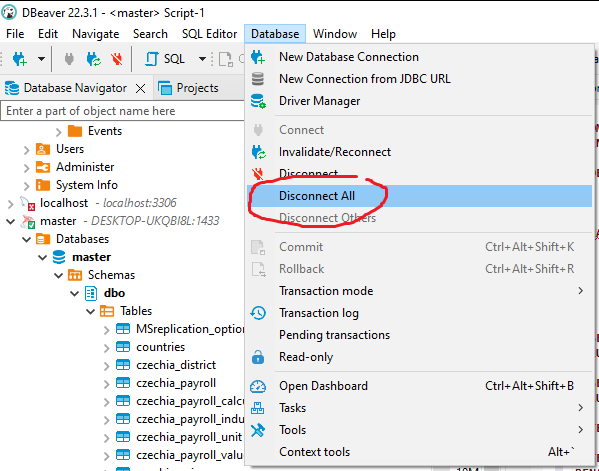

# Děkuji za pozornost



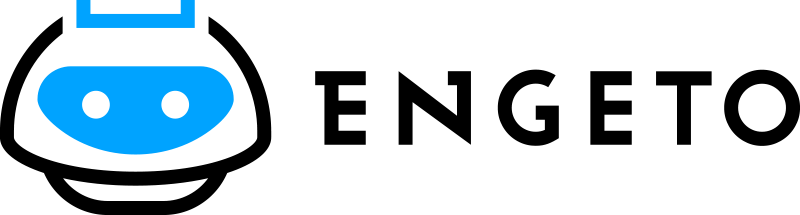

## Lektor - Jan Kammermayer

www.linkedin.com/in/kammermayerj
